## Agenda

- To assess the pattern of islamophobic crimes over a period of 12 years taking place primarily in the USA.
- To analyse the list of individual crimes against the muslim community to figure out most probable factors leading to such crimes
- To Identify the states (primarily in the USA) where the most no. of crimes against the muslim community have taken place
- To identify the different types of crimes which have been committed against muslims and in what degree
- To find a relationship between different types of crimes against the muslim community

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [170]:
crimes = pd.read_csv('https://raw.githubusercontent.com/Vaibhav-1911/DATA-602/main/public_conditions_master.csv')

In [171]:
crimes.head()

,Item #,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Description,Event Class,Gender of Victim(s),Source,Permanent URL
0,1,40.728007,-73.795853,11366,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,"Alauddin Akonjee, an Imam in Queens, New York,...",crimes against people,male,NaN,NaN
1,2,25.740529,-80.222168,33133,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,"Niala Mohammad, a journalist for Voice of Amer...",bias-related incident (targeting individual or...,female,NaN,NaN
2,3,43.644026,-79.365234,NaN,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,"Shan Anand, Faimul Alam, W.H., and M.K., four ...",bias-related incident (targeting individual or...,male,NaN,NaN
3,4,28.536275,-81.381912,32801,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,A fire destroys the Islamic Center of Fort Pie...,crimes against property,male and female,NaN,NaN
4,5,42.759113,-71.466064,3060,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,An unknown suspect or suspects throws three ro...,crimes against property,male and female,NaN,NaN


### Looking at the Different types of columns we have

In [172]:
crimes.columns

Index(['Item #', 'Latitude', 'Longitude', 'Zip_Code', 'State Abbrv. ', 'State',
       'Year', 'TimeStamp', 'Event (short name)', 'Event Description',
       'Event Class', 'Gender of Victim(s)', 'Source', 'Permanent URL'],
      dtype='object')

### Removing unnecessary columns from the dataframe

In [173]:
crimes.drop(["Item #", "Event Description", "Source", "Permanent URL"], axis = 1, inplace = True)
crimes.head()

,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Class,Gender of Victim(s)
0,40.728007,-73.795853,11366,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,crimes against people,male
1,25.740529,-80.222168,33133,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,bias-related incident (targeting individual or...,female
2,43.644026,-79.365234,NaN,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,bias-related incident (targeting individual or...,male
3,28.536275,-81.381912,32801,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,crimes against property,male and female
4,42.759113,-71.466064,3060,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,crimes against property,male and female


In [174]:
crimes.shape

(1947, 10)

### Checking if the Data Type is incorrect for any of the columns

In [175]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             1521 non-null   float64
 1   Longitude            1521 non-null   object 
 2   Zip_Code             1519 non-null   object 
 3   State Abbrv.         1522 non-null   object 
 4   State                1522 non-null   object 
 5   Year                 1522 non-null   float64
 6   TimeStamp            1521 non-null   object 
 7   Event (short name)   1522 non-null   object 
 8   Event Class          1522 non-null   object 
 9   Gender of Victim(s)  1522 non-null   object 
dtypes: float64(2), object(8)
memory usage: 152.2+ KB


**As we can see that columns "Longitude", "Zip_Code" and "Year" have the incorrect data types**

### Checking for null values in the Dataset

<AxesSubplot:>

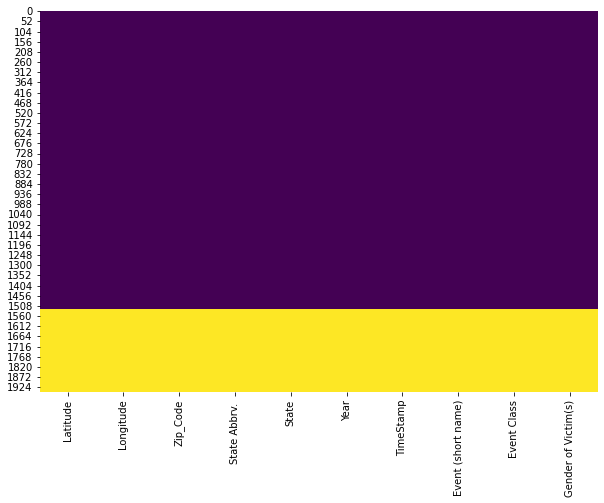

In [176]:
plt.figure(figsize=(10,7))
sns.heatmap(crimes.isnull(), cbar = False, cmap = 'viridis')

In [177]:
crimes_null = crimes[crimes.isnull().any(axis=1)]

In [178]:
crimes_null

,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Class,Gender of Victim(s)
2,43.644026,-79.365234,NaN,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,bias-related incident (targeting individual or...,male
1093,40.841620,-74.055005,NaN,NY,New York,2010.0,2010-08-26T00:00:00,Harassment,crimes against property,male and female
1430,NaN,NaN,NaN,MI,Michigan,2019.0,NaN,Violent Threat,bias-related incident (targeting individual or...,male and female
1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing null values from the dataset

In [179]:
crimes.drop(crimes.index[1522:], axis = 0, inplace = True)

In [180]:
crimes

,Latitude,Longitude,Zip_Code,State Abbrv.,State,Year,TimeStamp,Event (short name),Event Class,Gender of Victim(s)
0,40.728007,-73.795853,11366,NY,New York,2016.0,2016-08-13T00:00:00,Homicide,crimes against people,male
1,25.740529,-80.222168,33133,FL,Florida,2016.0,2016-08-03T00:00:00,Airport Discrimination,bias-related incident (targeting individual or...,female
2,43.644026,-79.365234,NaN,ON,Ontario,2016.0,2016-01-18T00:00:00,Airport Discrimination,bias-related incident (targeting individual or...,male
3,28.536275,-81.381912,32801,FL,Florida,2016.0,2016-09-11T00:00:00,Vandalism,crimes against property,male and female
4,42.759113,-71.466064,3060,NH,New Hampshire,2016.0,2016-09-11T00:00:00,Vandalism,crimes against property,male and female
...,...,...,...,...,...,...,...,...,...,...
1517,33.748900,-84.3881,30303,GA,Georgia,2020.0,2020-06-17T00:00:00,Hate Speech,public speech (political figures),male and female
1518,39.891700,-86.2486,46268,IN,Indiana,2020.0,2019-12-26T00:00:00,Emloyment Discrimination,bias-related incident (targeting individual or...,male
1519,42.477200,-83.0621,48091,MI,Michigan,2020.0,2020-07-10T00:00:00,Vandalism,crimes against property,male and female
1520,39.123900,-94.8123,66111,MO,Missouri,2020.0,2020-07-16T00:00:00,Harassment,bias-related incident (targeting individual or...,female


### Setting the correct data types for the respective columns

In [181]:
crimes.loc[:, "Longitude"].replace("30.492883, ", "30.492883", inplace = True)
datatypes_dict = {'Longitude': float, 'Zip_Code': int, "Year": int}
crimes = crimes.astype(datatypes_dict, errors='ignore')

In [182]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 0 to 1521
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             1521 non-null   float64
 1   Longitude            1521 non-null   float64
 2   Zip_Code             1519 non-null   object 
 3   State Abbrv.         1522 non-null   object 
 4   State                1522 non-null   object 
 5   Year                 1522 non-null   int32  
 6   TimeStamp            1521 non-null   object 
 7   Event (short name)   1522 non-null   object 
 8   Event Class          1522 non-null   object 
 9   Gender of Victim(s)  1522 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 124.9+ KB


In [183]:
crimes['Zip_Code'] = pd.to_numeric(crimes['Zip_Code'], errors='coerce')

In [184]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522 entries, 0 to 1521
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             1521 non-null   float64
 1   Longitude            1521 non-null   float64
 2   Zip_Code             1514 non-null   float64
 3   State Abbrv.         1522 non-null   object 
 4   State                1522 non-null   object 
 5   Year                 1522 non-null   int32  
 6   TimeStamp            1521 non-null   object 
 7   Event (short name)   1522 non-null   object 
 8   Event Class          1522 non-null   object 
 9   Gender of Victim(s)  1522 non-null   object 
dtypes: float64(3), int32(1), object(6)
memory usage: 124.9+ KB


### Looking at basic statistics of the Dataset

In [185]:
crimes.describe()

,Latitude,Longitude,Zip_Code,Year
count,1521.000000,1521.000000,1514.000000,1522.000000
mean,38.486931,-89.719736,46708.232497,2015.429041
std,5.053280,16.557159,30058.829145,2.798849
min,25.658993,-149.858956,0.000000,2008.000000
25%,34.536156,-96.808961,20036.000000,2014.000000
50%,39.486124,-84.719996,45069.000000,2016.000000
75%,41.887295,-77.036498,74841.500000,2017.000000
max,61.218617,74.873196,99801.000000,2020.000000


**Our Data Ranges from the years 2008 to 2020**

In [186]:
crimes["State"].nunique()

51

<function matplotlib.pyplot.show(close=None, block=None)>

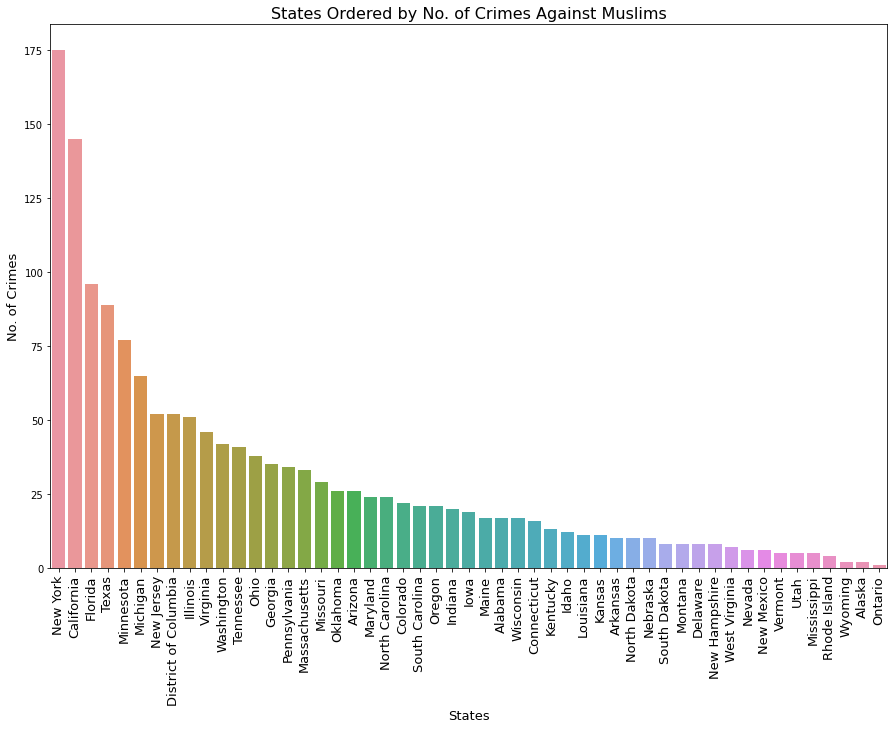

In [187]:
plt.figure(figsize = (15, 10))
sns.countplot(x= 'State', data = crimes, order = crimes['State'].value_counts().iloc[:51].index)

plt.xticks(rotation = 'vertical', fontsize = 13)

plt.title("States Ordered by No. of Crimes Against Muslims", fontdict = {"fontsize":16})
plt.xlabel("States", fontdict = {"fontsize":13})
plt.ylabel("No. of Crimes", fontdict = {"fontsize":13})

plt.show

**Here we can see that the most no. of crimes have occured in states like "New York", "California" and "Florida". These are probably the states with the biggest concentration of immigrants and non-immigrants from religions and cultures from all over the world. Probably because of a higher density of Muslims residing in these states as compared to other states, the crime rate against Muslims is also higher for these states.**

<function matplotlib.pyplot.show(close=None, block=None)>

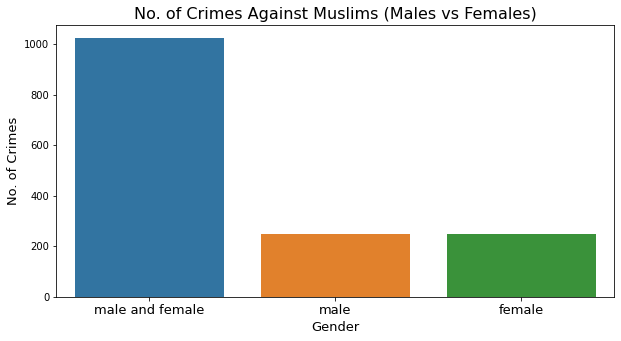

In [188]:
plt.figure(figsize = (10, 5))
sns.countplot(x= 'Gender of Victim(s)', data = crimes, order = crimes['Gender of Victim(s)'].value_counts().iloc[:3].index)

plt.xticks(rotation = 'horizontal', fontsize = 13)

plt.title("No. of Crimes Against Muslims (Males vs Females)", fontdict = {"fontsize":16})
plt.xlabel("Gender", fontdict = {"fontsize":13})
plt.ylabel("No. of Crimes", fontdict = {"fontsize":13})

plt.show

**The level of crimes do not differ significantly when compared on gender basis**

In [189]:
crimes["Event Class"].nunique()

6

In [190]:
print(sorted(crimes["Event Class"].unique()))

['bias-related incident (targeting individual or specific group)', 'crimes against people', 'crimes against property', 'legislation (targeting community)', 'public campaigns (targeting community)', 'public speech (political figures)']


In [191]:
event_class_mod = ['bias-related incident\n(targeting individual or\nspecific group)', 'crimes against\npeople', 'crimes against\nproperty', 'legislation\n(targeting community)', 'public campaigns\n(targeting community)', 'public speech\n(political figures)']

<function matplotlib.pyplot.show(close=None, block=None)>

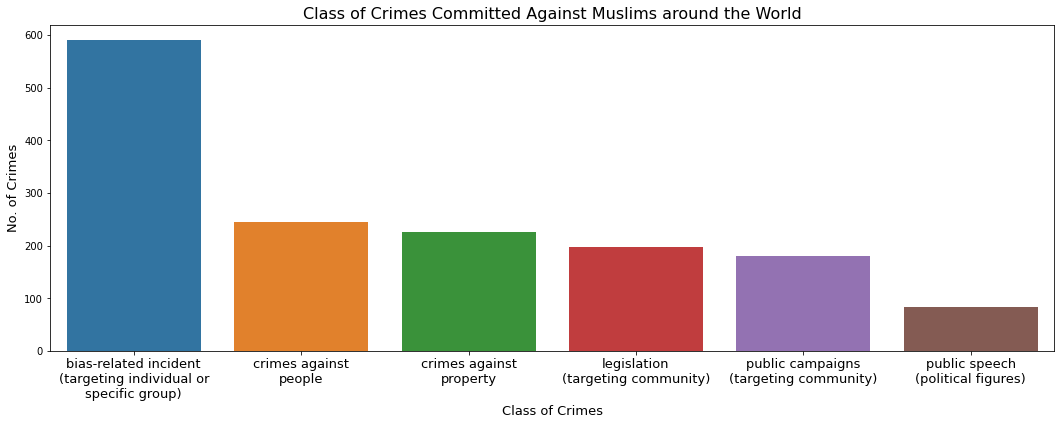

In [192]:
plt.figure(figsize = (18, 6))
sns.countplot(x= 'Event Class', data = crimes, order = crimes['Event Class'].value_counts().iloc[:6].index)

plt.xticks(ticks = [0,1,2,3,4,5], labels= event_class_mod, rotation = 0, fontsize = 13)

plt.title("Class of Crimes Committed Against Muslims around the World", fontdict = {"fontsize":16})
plt.xlabel("Class of Crimes", fontdict = {"fontsize":13})
plt.ylabel("No. of Crimes", fontdict = {"fontsize":13})

plt.show

**Targeting the specific community encapsulates the highest no. of crimes against Muslims**

In [193]:
crimes["Event (short name)"].nunique()

28

In [194]:
print(sorted(crimes["Event (short name)"].unique()))

['Airport Discrimination', 'Anti-Cemetery Campaign', 'Anti-Mosque Campaign', 'Arson', 'Assault', 'Attempted Homicide', 'Burglary', 'Detention Discrimination', 'Education Discrimination', 'Emloyment Discrimination', 'Employment Discrimination', 'Executive Order', 'Harassment', 'Hate Speech', 'Homicide', 'Land-Use Discrimination', 'Legislative Discrimination', 'National Political Speech', 'Political Appointment', 'Political Speech', 'Presidential Election', 'Public Campaign', "Qur'an Desecration", 'Travel Ban', 'Vandalism', 'Violent Incident', 'Violent Threat', 'vandalism']


**We notice following duplicate values:**
- "Emloyment Discrimination" vs "Employment Discrimination"
- "Vandalism" vs "vandalism"

In [195]:
crimes.loc[:, "Event (short name)"].replace("Emloyment Discrimination", "Employment Discrimination", inplace = True)
crimes.loc[:, "Event (short name)"].replace("vandalism", "Vandalism", inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

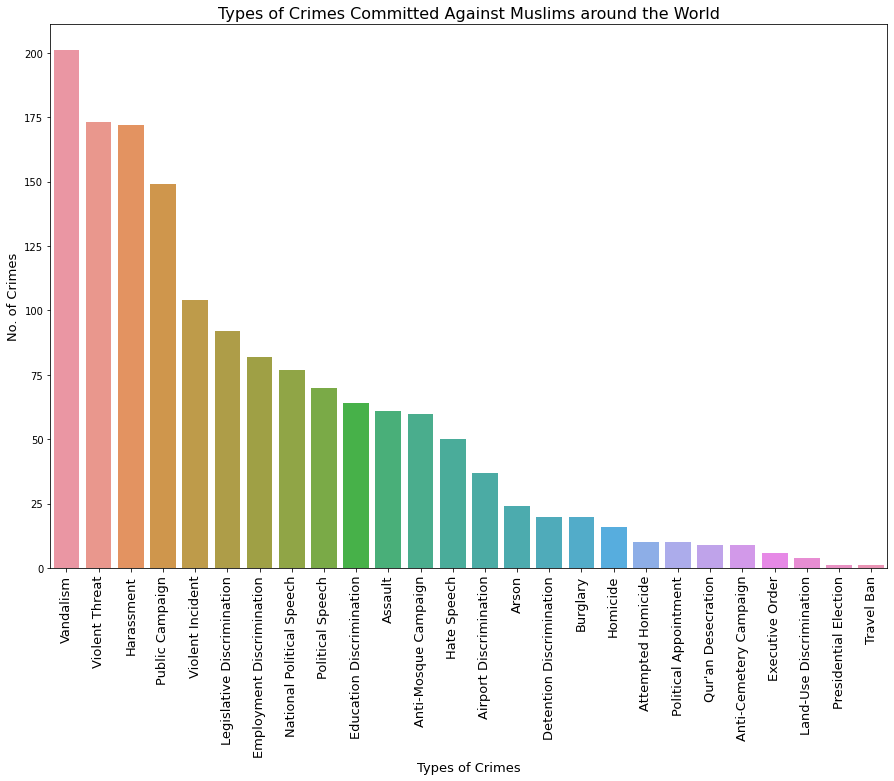

In [196]:
plt.figure(figsize = (15, 10))
sns.countplot(x= 'Event (short name)', data = crimes, order = crimes['Event (short name)'].value_counts().iloc[:28].index)

plt.xticks(rotation = 'vertical', fontsize = 13)

plt.title("Types of Crimes Committed Against Muslims around the World", fontdict = {"fontsize":16})
plt.xlabel("Types of Crimes", fontdict = {"fontsize":13})
plt.ylabel("No. of Crimes", fontdict = {"fontsize":13})

plt.show

**The most common types of crimes against muslims turned out to be the sorts of "Vandalism", "Violent Threats", "Harrassment" and surprisingly "Public Campaigns" as well.**

### Dividing the "TimeStamp" column to ascertain Dates, Months and Years separately for deeper analysis.

In [197]:
import datetime

crimes['TimeStamp'] = crimes['TimeStamp'].str.replace('T', ' ')
crimes.TimeStamp = pd.to_datetime(crimes.TimeStamp, format='%y-%m-%d %H:%M:%S', errors = 'ignore')
crimes.index = pd.DatetimeIndex(crimes.TimeStamp)

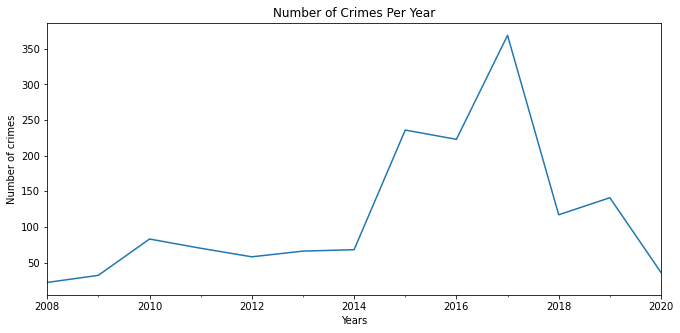

In [198]:
plt.figure(figsize=(11,5))
crimes.resample('y').size().plot(legend=False)
plt.title('Number of Crimes Per Year')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

**We can see there is a sharp spike in the no. of crimes between the years 2014 and 2018**

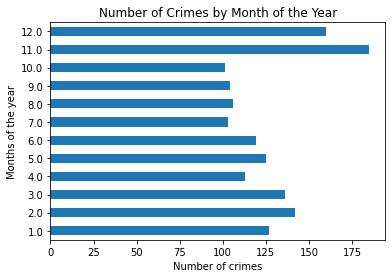

In [199]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of Crimes by Month of the Year')
plt.show()

**The highest no. of crimes have taken place towards the end of the year during the months of November and December**

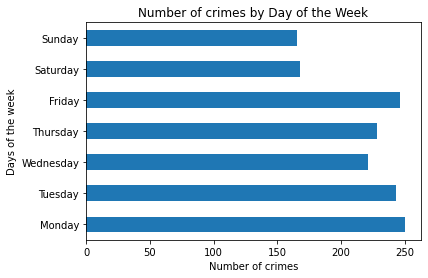

In [200]:
days = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Day of the Week')
plt.show()

**Apparently, most crimes took place during weekdays and there was a slight fall in crime rates during the weekends**

## Analysing Trends in occurance of different types of crimes over the years##

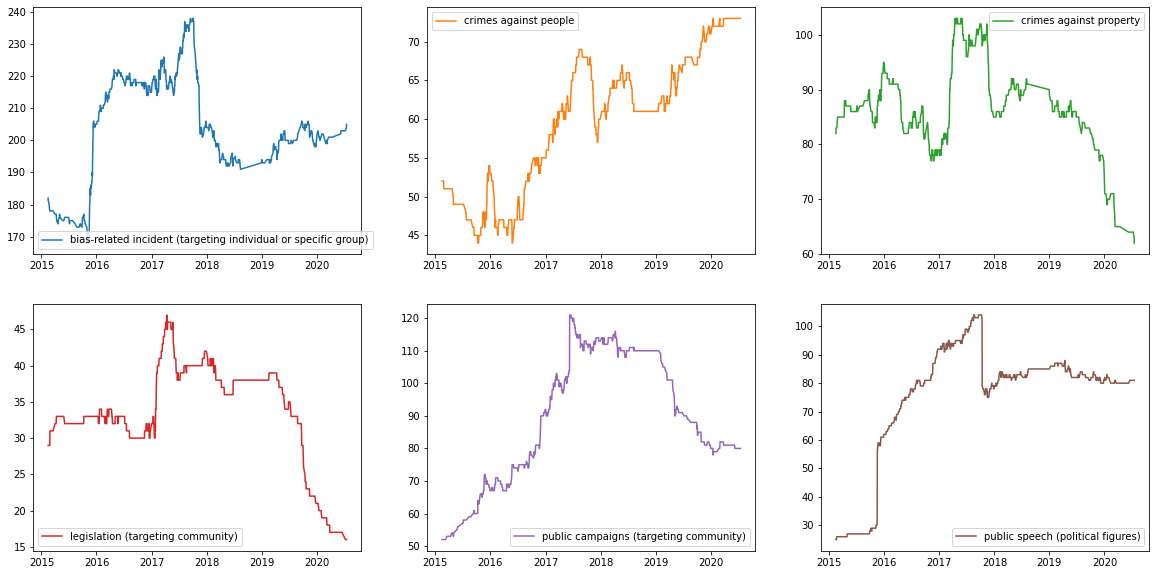

In [201]:
crimes_count_date = crimes.pivot_table('Year', aggfunc=np.size, columns=['Event Class'], index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 10), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

### Observations

- For the years where there was a sharp spike in the no. of crimes against muslims we can see that crimes such as "crimes against people" and "Public speech (political figures)" were on a significant rise as well.

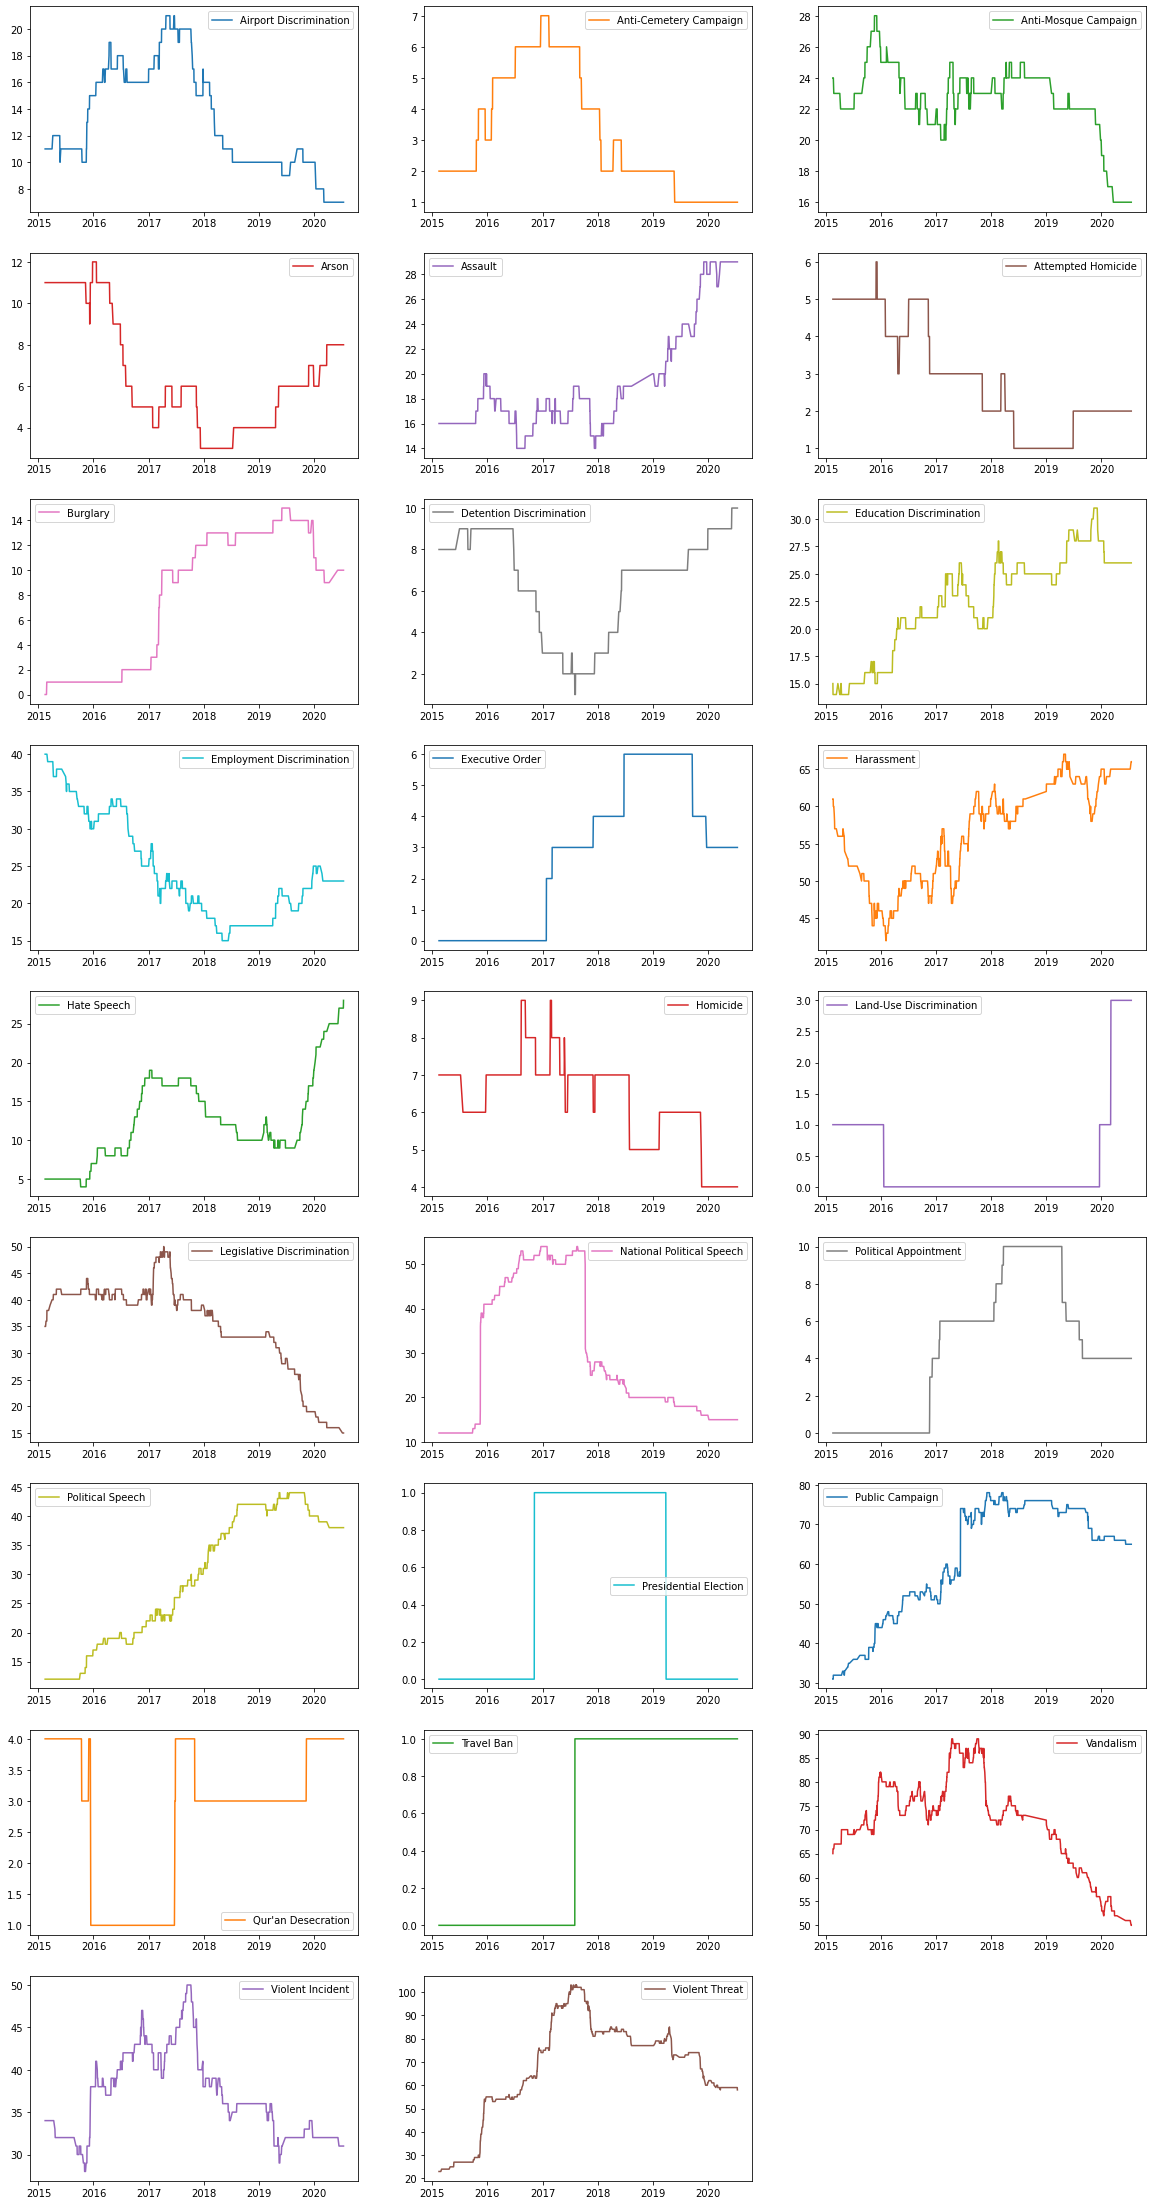

In [202]:
crimes_count_date = crimes.pivot_table('Year', aggfunc=np.size, columns=['Event (short name)'], index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(20, 40), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

### Observations

- On a deeper level we can see that with a rise in crimes related to "Hate Speech", "Political Speech" etc. there is a rise in crimes like Harrassment and Discrimination against the muslim commuinity.